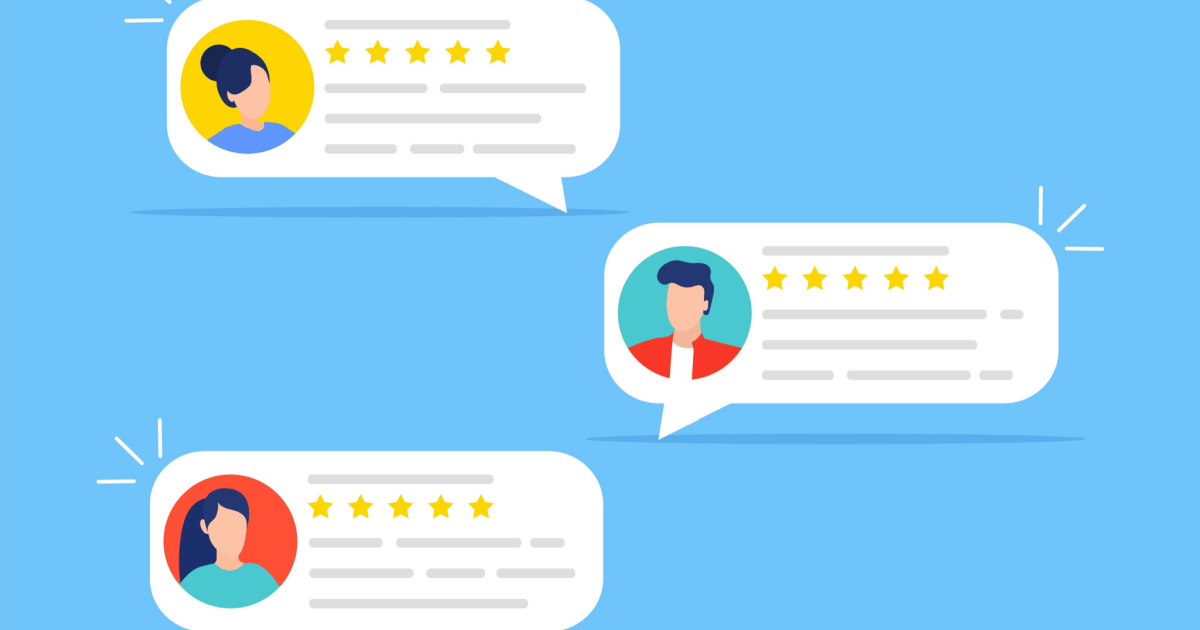

In [ ]:
%pip install pyspark
%pip install nltk
%pip install stanza
%pip install pyarabic
%pip install farasa
%pip install ar-corrector
%pip install farasapy
%pip install spacy
%pip install pyarrow
%pip install wordcloud



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=12015ecc852c5996d3ca558ba32387cef9d1b35bb553484ad6c0c4db8c72114e
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for stanza from https://files.pythonhosted.org/packages/6f/13/274b9259c2cea6123196bce97626fb384cc64798f1e84801da39cf178983/stanza-1.7.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 933.2/933.2 kB 12.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Starting Spark Session

# package library

In [ ]:
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType
from pyspark.sql import SparkSession
from pyspark.sql.functions import regexp_replace
import pyspark as sp
from pyspark.sql.functions import *
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType
from pyspark.mllib.classification import SVMModel, SVMWithSGD
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.linalg import Vectors as MLLibVectors
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.feature import *
from pyspark.ml.tuning import CrossValidator
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.sql.types import StringType
from nltk.stem.porter import *
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from pyspark.sql.functions import regexp_replace
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.patches import Ellipse
from pyspark.sql.functions import isnan, when, count, col
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import iplot
from pyspark.sql.functions import udf
import re
from pyspark.sql.types import StringType
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
import re
from pyspark.sql import SparkSession
from pyspark.sql.functions import regexp_replace
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
from pyspark.sql.functions import udf, col
from pyspark.sql.types import StringType
import re
from pyspark.sql.functions import col
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from pyspark.sql.functions import pandas_udf
from pyspark.sql.types import StringType
from farasa.stemmer import FarasaStemmer
from pyspark.sql.functions import concat_ws
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
import re
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
from pyspark.ml import Transformer
from pyspark.ml.param import Param, Params
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
from pyspark.ml.feature import Tokenizer, HashingTF, IDF
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.linalg import Vector
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark.ml.feature import Tokenizer, HashingTF, IDF
from pyspark.ml import Pipeline
from pyspark.sql.types import DoubleType
from pyspark.sql import SparkSession
from pyspark.ml.feature import Tokenizer, HashingTF, IDF, VectorAssembler
from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml import Pipeline
from pyspark.sql.functions import when, col


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

# Set Spark configurations
spark_conf = SparkConf().setAll([
    ("spark.executor.memory", "8g"),
    ("spark.sql.shuffle.partitions", "8"),
    ("spark.storage.memoryFraction", "0.4"),  # Adjust as needed
    ("spark.shuffle.memoryFraction", "0.1")  # Adjust as needed
])

# Create a Spark session with the desired configurations
spark = SparkSession.builder \
    .appName("YourAppName") \
    .config(conf=spark_conf) \
    .getOrCreate()

# Now you can proceed with the rest of your Spark code


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/01/02 16:00:51 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [ ]:
spark

## Reading Data Files and Joining them into one dataset

In [ ]:
import pandas as pd

# File path for the Excel file
excel_file_path = '/kaggle/input/arabic-reviews-sentiment-analysis/original_dataset.xlsx'

# File path for the output CSV file
csv_file_path = '/kaggle/working/convert.csv'

# Read the Excel file
df = pd.read_excel(excel_file_path)

# Write to a CSV file
df.to_csv(csv_file_path, index=False)

print("Conversion completed. CSV file created at:", csv_file_path)


Conversion completed. CSV file created at: /kaggle/working/convert.csv


In [ ]:
file_path = '/kaggle/working/convert.csv'

#Read in the airports path
df= spark.read.csv(file_path, header=True)

df.take(10)

[Row(Unnamed: 0='0', review_description='سيئ جدا بعد الإصدار الجديد', rating='-1', company='alahli_bank'),
 Row(Unnamed: 0='1', review_description='ابلكيشن زباله بجد', rating='-1', company='alahli_bank'),
 Row(Unnamed: 0='2', review_description='سيئ التطبيق لايعمل', rating='-1', company='alahli_bank'),
 Row(Unnamed: 0='3', review_description='للأسف التطبيق للأسوأ كان جدا رائع وسهل وبسيط الآن معقد ولا يفتح معاك بسهولة ولا تجد كل الخدمات متاحة لك', rating='-1', company='alahli_bank'),
 Row(Unnamed: 0='4', review_description='التحديث بطيئ جدا جدا عند الفتح', rating='-1', company='alahli_bank'),
 Row(Unnamed: 0='5', review_description='مرررره زق من بعد اخر تحديث ما فتحلي ابدآ ويرفض اي كلمه مرور اكتبها او رقم البطاقه ..الاهلي خربتوا تطبيق اغلب الناس كانت معتمده عليه للأسف', rating='-1', company='alahli_bank'),
 Row(Unnamed: 0='6', review_description='التطبيق ما يشتغل كل ما اعمل تسجيل دخول على حسابي ما يفتح شوفو لكم حل انا معطله', rating='-1', company='alahli_bank'),
 Row(Unnamed: 0='7', rev

# show number of column and rows

In [ ]:
num_rows = df.count()
num_columns = len(df.columns)
print(f'Number of rows: {num_rows}, Number of columns: {num_columns}')

Number of rows: 68018, Number of columns: 4


In [ ]:
df.head(20)

[Row(Unnamed: 0='0', review_description='سيئ جدا بعد الإصدار الجديد', rating='-1', company='alahli_bank'),
 Row(Unnamed: 0='1', review_description='ابلكيشن زباله بجد', rating='-1', company='alahli_bank'),
 Row(Unnamed: 0='2', review_description='سيئ التطبيق لايعمل', rating='-1', company='alahli_bank'),
 Row(Unnamed: 0='3', review_description='للأسف التطبيق للأسوأ كان جدا رائع وسهل وبسيط الآن معقد ولا يفتح معاك بسهولة ولا تجد كل الخدمات متاحة لك', rating='-1', company='alahli_bank'),
 Row(Unnamed: 0='4', review_description='التحديث بطيئ جدا جدا عند الفتح', rating='-1', company='alahli_bank'),
 Row(Unnamed: 0='5', review_description='مرررره زق من بعد اخر تحديث ما فتحلي ابدآ ويرفض اي كلمه مرور اكتبها او رقم البطاقه ..الاهلي خربتوا تطبيق اغلب الناس كانت معتمده عليه للأسف', rating='-1', company='alahli_bank'),
 Row(Unnamed: 0='6', review_description='التطبيق ما يشتغل كل ما اعمل تسجيل دخول على حسابي ما يفتح شوفو لكم حل انا معطله', rating='-1', company='alahli_bank'),
 Row(Unnamed: 0='7', rev

# describe data

In [ ]:
df.describe().take(10)

24/01/02 16:01:21 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


[Row(summary='count', Unnamed: 0='68018', review_description='67611', rating='67127', company='66642'),
 Row(summary='mean', Unnamed: 0='4.0381590817024195E8', review_description='2043.3061224489795', rating='-0.038729329852045254', company=None),
 Row(summary='stddev', Unnamed: 0='1.0461625760607266E11', review_description='45175.30474561365', rating='0.8020119917683447', company=None),
 Row(summary='min', Unnamed: 0='          😠😡🤬"', review_description=' and sets the bar very high for all other employees to follow."', rating='-1', company='Raya'),
 Row(summary='max', Unnamed: 0='😲"', review_description='🧡🧡', rating='talbat', company='venus')]

# Putting Dataset into Cache

In [ ]:
# cache  dataframes
df.cache()

DataFrame[Unnamed: 0: string, review_description: string, rating: string, company: string]

In [ ]:
df = df.drop('Unnamed: 0')
# Show the result
df.head(10)

[Row(review_description='سيئ جدا بعد الإصدار الجديد', rating='-1', company='alahli_bank'),
 Row(review_description='ابلكيشن زباله بجد', rating='-1', company='alahli_bank'),
 Row(review_description='سيئ التطبيق لايعمل', rating='-1', company='alahli_bank'),
 Row(review_description='للأسف التطبيق للأسوأ كان جدا رائع وسهل وبسيط الآن معقد ولا يفتح معاك بسهولة ولا تجد كل الخدمات متاحة لك', rating='-1', company='alahli_bank'),
 Row(review_description='التحديث بطيئ جدا جدا عند الفتح', rating='-1', company='alahli_bank'),
 Row(review_description='مرررره زق من بعد اخر تحديث ما فتحلي ابدآ ويرفض اي كلمه مرور اكتبها او رقم البطاقه ..الاهلي خربتوا تطبيق اغلب الناس كانت معتمده عليه للأسف', rating='-1', company='alahli_bank'),
 Row(review_description='التطبيق ما يشتغل كل ما اعمل تسجيل دخول على حسابي ما يفتح شوفو لكم حل انا معطله', rating='-1', company='alahli_bank'),
 Row(review_description='اذا قمت بفتح التطبيق يطلب تحديث واذا ضغطت على التحديث ما يقبل التحديث لاهو اللي فتح ولاهو اللي تحدث وش المشكله'

## show name of column

In [ ]:
df.columns

['review_description', 'rating', 'company']

In [ ]:
df.printSchema()

root
 |-- review_description: string (nullable = true)
 |-- rating: string (nullable = true)
 |-- company: string (nullable = true)



# Size dataset

In [ ]:
df.count()

68018

In [ ]:
len(df.columns)

3

# print Schema

In [ ]:
df.printSchema()

root
 |-- review_description: string (nullable = true)
 |-- rating: string (nullable = true)
 |-- company: string (nullable = true)



In [ ]:
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+------------------+------+-------+
|review_description|rating|company|
+------------------+------+-------+
|               407|   891|   1376|
+------------------+------+-------+



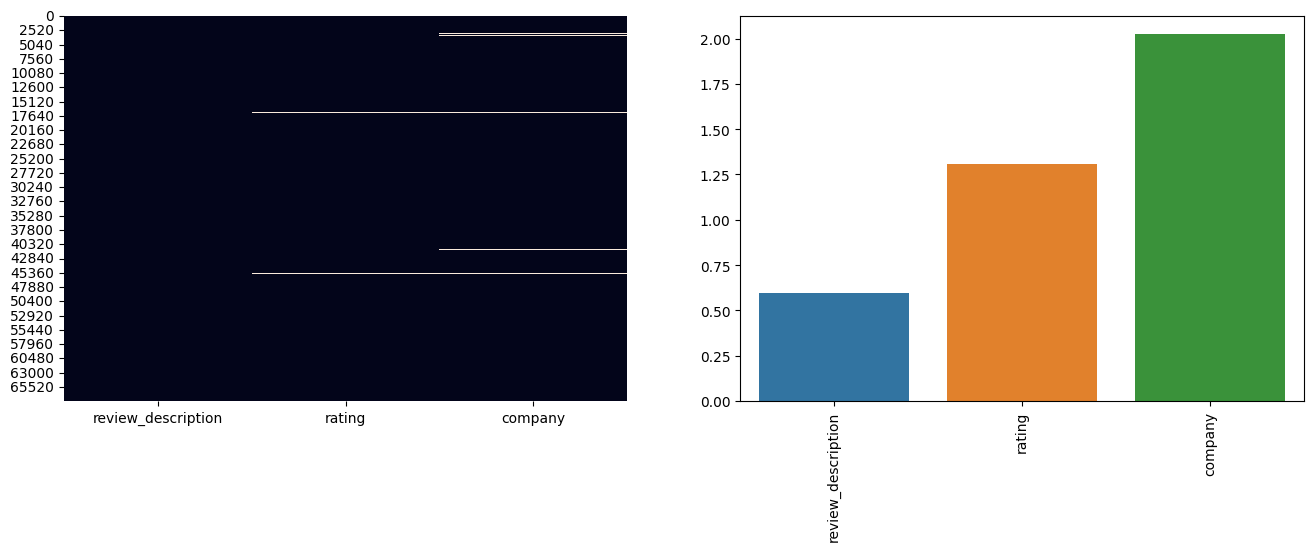

In [ ]:
#Replace zeros with nan
d_copy = df.toPandas()

d_copy = d_copy.replace(0,np.nan)
#sns.heatmap(d_copy.isnull(),cmap = 'magma',cbar = False);

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
sns.heatmap(d_copy.isnull(), cbar=False, ax=ax1)
percent_missing = d_copy.isnull().mean() * 100
sns.barplot(x=percent_missing.index, y=percent_missing ,ax=ax2)
plt.xticks(rotation=90)
plt.show()

# check Size data

In [ ]:
print("Rows count: "+str(df.count()))
print("Distinct count: "+str(df.distinct().count()))

Rows count: 68018


Distinct count: 67029


# rating

In [ ]:
num_rows = df.count()
num_columns = len(df.columns)
print(f'Number of rows: {num_rows}, Number of columns: {num_columns}')

Number of rows: 68018, Number of columns: 3


In [ ]:
df= df.filter(df.review_description!= 'NaN')

In [ ]:
df= df.filter(df.rating!= 'NaN')

In [ ]:
df= df.filter(df.company!= 'NaN')

In [ ]:
schema = StructType([
    StructField("review_description", StringType(), True),
    StructField("rating", StringType(), True),
    StructField("company", IntegerType(), True),
])


In [ ]:

df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+------------------+------+-------+
|review_description|rating|company|
+------------------+------+-------+
|                 0|     0|      0|
+------------------+------+-------+



# Remove duplicate

In [ ]:
# Remove duplicate rows based on 'review_description' column
df= df.dropDuplicates(['review_description','rating','company'])

# Show the result
df.take(10)

[Row(review_description='سيئ جدا بعد الإصدار الجديد', rating='-1', company='alahli_bank'),
 Row(review_description='البرنامج القديم افضل سئ وتحديثاته لا تعمل وغير ناجح', rating='-1', company='alahli_bank'),
 Row(review_description='بنك سيء يغلقون الحساب على اشياء غريبه للتوقيع ولا يتم حل المشكله من اول زياره تحتاج تداوم عندهم بالفرع عشان يرجعوا الحساب', rating='-1', company='alahli_bank'),
 Row(review_description='التحديث غير جيد بالمرة لا يمكن اضافة مستفيد دولي.. طوروا من الخدمات افضل من انكم تطوروا الجرافيك الي يثقل البرنامج ويخليه غبي', rating='-1', company='alahli_bank'),
 Row(review_description='بعد تحديث الشكل الجديد صارت تتأخر اشعارات البنك', rating='-1', company='alahli_bank'),
 Row(review_description='التحديث الأخير مايصلح', rating='-1', company='alahli_bank'),
 Row(review_description='التطبيق الجديد جدا جدا سيء', rating='-1', company='alahli_bank'),
 Row(review_description='سي جدا جدا وأنصح بعدم تحميله', rating='-1', company='alahli_bank'),
 Row(review_description='تطبيق لا ي

In [ ]:
num_rows = df.count()
num_columns = len(df.columns)
print(f'Number of rows: {num_rows}, Number of columns: {num_columns}')

Number of rows: 66534, Number of columns: 3


In [ ]:
comments_rdd = df.select("review_description").rdd.flatMap(lambda x: x)

In [ ]:
comments_rdd_lower = comments_rdd.map(lambda x : x.lower())

In [ ]:
comments_rdd_lower.collect()

['سيئ جدا بعد الإصدار الجديد',
 'البرنامج القديم افضل سئ وتحديثاته لا تعمل وغير ناجح',
 'بنك سيء يغلقون الحساب على اشياء غريبه للتوقيع ولا يتم حل المشكله من اول زياره تحتاج تداوم عندهم بالفرع عشان يرجعوا الحساب',
 'التحديث غير جيد بالمرة لا يمكن اضافة مستفيد دولي.. طوروا من الخدمات افضل من انكم تطوروا الجرافيك الي يثقل البرنامج ويخليه غبي',
 'بعد تحديث الشكل الجديد صارت تتأخر اشعارات البنك',
 'التحديث الأخير مايصلح',
 'التطبيق الجديد جدا جدا سيء',
 'سي جدا جدا وأنصح بعدم تحميله',
 'تطبيق لا يتح لك خيارات اكثر خصوصيه مثلا لا يمكن الاستعلام ل قرضك الشخصي وخاصيه التسديد المبكر. لا يمكن لهم التطوير ك بقيه البنوك ك بنك الراجحي و تطبيقه',
 'من اخس التطبيقات واخس البنوك',
 'لم أستطع اوافق، علي الشروط،ولاحكام',
 'اخس بنك بالتعامل والفوائد',
 'رفض يحمل',
 'التطبيق يكتب نرجو التحديث و هو اصلا محدث و لا يفتح تطبيق الاهلي من سئ لاسواء',
 'تأخير الارساك كويك باي',
 'جميل جمال مالوش مثال',
 'البرنامج طلب مني تحديث ولي اكثر من ٣ ساعات عشان انزل التطبيق مو قادر يجلس يلف لف نأمل إصلاح العطل',
 'انا جوا

# Remove Section

1- Removing mentions @

2- Removing HTML/XML tags

3- Remove "Viaa"

4- Remove punctuation and special

5- Regular expression for Arabic diacritics

6- Remove Tatweel (Kashida)

7- Remove Extra Characters

8- Removing tages

9- Removing URLs

10- Remove number

In [ ]:
# Removing mentions @
df = df.withColumn('review_description', regexp_replace('review_description', r'@\w+', ''))

# Removing HTML/XML tags
df = df.withColumn('review_description', regexp_replace('review_description', r'<[^>]+>', ''))

# Remove "Viaa"
df = df.withColumn('review_description', regexp_replace('review_description', 'Viaa', ''))

# Removing tages
df = df.withColumn('review_description', regexp_replace('review_description', '#\w+', ''))

# Remove punctuation and special characters
punctuation_regex = r'[!"#$%&()*+,\-./:;<=>?@\[\\\]^_`{|}~،؟]'
df = df.withColumn('review_description', regexp_replace('review_description', punctuation_regex, ''))

# Regular expression for Arabic diacritics
arabic_diacritics = '[\u064B-\u065F\u06D6-\u06DC\u06DF-\u06E8\u06EA-\u06ED]'
df = df.withColumn('review_description', regexp_replace('review_description', arabic_diacritics, ''))

# Remove Tatweel (Kashida)
df = df.withColumn('review_description', regexp_replace('review_description', '\u0640', ''))

# Remove Extra Characters
from pyspark.sql.functions import regexp_replace

# Pattern to identify repeated characters and replace them with a single instance
pattern = r'(.)\1+'

df = df.withColumn('review_description', regexp_replace('review_description', pattern, r'\1'))

# remove number
df = df.withColumn('review_description', regexp_replace('review_description', '\\d+', ''))
df.take(30)


[Row(review_description='سيئ جدا بعد الإصدار الجديد', rating='-1', company='alahli_bank'),
 Row(review_description='البرنامج القديم افضل سئ وتحديثاته لا تعمل وغير ناجح', rating='-1', company='alahli_bank'),
 Row(review_description='بنك سيء يغلقون الحساب على اشياء غريبه توقيع ولا يتم حل المشكله من اول زياره تحتاج تداوم عندهم بالفرع عشان يرجعوا الحساب', rating='-1', company='alahli_bank'),
 Row(review_description='التحديث غير جيد بالمرة لا يمكن اضافة مستفيد دولي طوروا من الخدمات افضل من انكم تطوروا الجرافيك الي يثقل البرنامج ويخليه غبي', rating='-1', company='alahli_bank'),
 Row(review_description='بعد تحديث الشكل الجديد صارت أخر اشعارات البنك', rating='-1', company='alahli_bank'),
 Row(review_description='التحديث الأخير مايصلح', rating='-1', company='alahli_bank'),
 Row(review_description='التطبيق الجديد جدا جدا سيء', rating='-1', company='alahli_bank'),
 Row(review_description='سي جدا جدا وأنصح بعدم تحميله', rating='-1', company='alahli_bank'),
 Row(review_description='تطبيق لا يتح لك 

# EDA

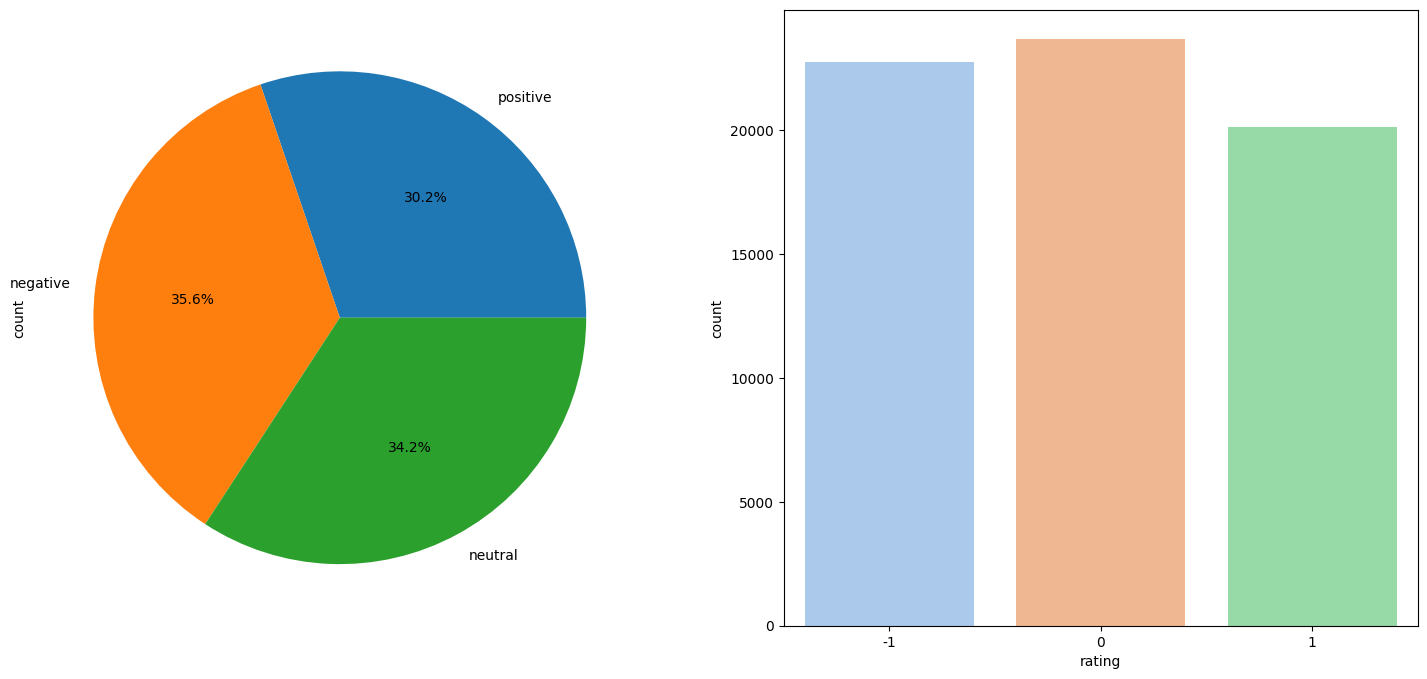

In [ ]:
# Pie chart
df_spark = df  # Assuming df is already a PySpark DataFrame
counts = df_spark.select("rating").groupBy("rating").count().toPandas()

plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
counts['count'].plot(kind="pie", fontsize=10, labels=["positive", "negative", "neutral"], autopct='%1.1f%%')

# Count plot
plt.subplot(1, 2, 2)
sns.countplot(x="rating", data=df_spark.toPandas(), palette="pastel")

plt.show()


# Show Company

In [ ]:
df_pandas = df.select("company").toPandas()

# Create a Plotly Pie chart
fig = go.Figure(data=[go.Pie(labels=df_pandas["company"].unique(),
                             values=df_pandas["company"].value_counts(),
                             hole=0.5)])

# Show the Plotly figure
iplot(fig)

# Show rating company

In [ ]:
# Convert PySpark DataFrame to Pandas DataFrame
df_pandas = df.select("company", "rating").toPandas()

# Iterate through unique companies and create Plotly bar charts
for companyName in df_pandas["company"].unique():
    company_data = df_pandas[df_pandas["company"] == companyName]
    fig = go.Figure(data=[go.Bar(y=company_data["rating"].value_counts(),
                                 x=company_data["rating"].unique())])
    fig.update_layout(title=companyName + ' Ratings')
    iplot(fig)

# reduce repeated chars

In [ ]:
def reduce_repeated_chars(text):
    # Replace more than 2 repeated characters with a single instance
    return re.sub(r'(.)\1+', r'\1', text)

reduce_udf = udf(reduce_repeated_chars, StringType())

df = df.withColumn('review_description', reduce_udf('review_description'))
df = df.withColumn('review_description', regexp_replace('review_description', '\\s+', ' '))
df = df.withColumn('review_description', reduce_udf('review_description'))
df.take(10)

[Row(review_description='سيئ جدا بعد الإصدار الجديد', rating='-1', company='alahli_bank'),
 Row(review_description='البرنامج القديم افضل سئ وتحديثاته لا تعمل وغير ناجح', rating='-1', company='alahli_bank'),
 Row(review_description='بنك سيء يغلقون الحساب على اشياء غريبه توقيع ولا يتم حل المشكله من اول زياره تحتاج تداوم عندهم بالفرع عشان يرجعوا الحساب', rating='-1', company='alahli_bank'),
 Row(review_description='التحديث غير جيد بالمرة لا يمكن اضافة مستفيد دولي طوروا من الخدمات افضل من انكم تطوروا الجرافيك الي يثقل البرنامج ويخليه غبي', rating='-1', company='alahli_bank'),
 Row(review_description='بعد تحديث الشكل الجديد صارت أخر اشعارات البنك', rating='-1', company='alahli_bank'),
 Row(review_description='التحديث الأخير مايصلح', rating='-1', company='alahli_bank'),
 Row(review_description='التطبيق الجديد جدا جدا سيء', rating='-1', company='alahli_bank'),
 Row(review_description='سي جدا جدا وأنصح بعدم تحميله', rating='-1', company='alahli_bank'),
 Row(review_description='تطبيق لا يتح لك 

In [ ]:
test_sentence = "حتاج ادخل العنوان ادخله بسسسسسسسسسسسسسسسسسسسسسسسسسسسسسسسسسسسسسسسسس ما يزبط اتطبيق مو حلو"
result = reduce_repeated_chars(test_sentence)
result


'حتاج ادخل العنوان ادخله بس ما يزبط اتطبيق مو حلو'

## Dictionaries for emoji and emoticon replacement

In [ ]:
# Dictionaries for emoji and emoticon replacement
emojis = {
    "🙂":" يبتسم ",
    "😂":" يضحك ",
    "💔":" قلب حزين ",
    "🙂":" يبتسم ",
    "❤️":" حب ",
    "❤":" حب ",
    "😍":" حب ",
    "😭":" يبكي ",
    "😢":" حزن ",
    "😔":" حزن ",
    "♥":" حب ",
    "💜":" حب ",
    "😅":" يضحك ",
    "🙁":" حزين ",
    "💕":" حب ",
    "💙":" حب ",
    "😞":" حزين ",
    "😊":" سعادة ",
    "👏":" يصفق ",
    "👌":" احسنت ",
    "😴":" ينام ",
    "😀":" يضحك ",
    "😌":" حزين ",
    "🌹":" وردة ",
    "🙈":" حب ",
    "😄":" يضحك ",
    "😐":" محايد ",
    "✌":" منتصر ",
    "✨":" نجمه ",
    "🤔":" تفكير ",
    "😏":" يستهزء ",
    "😒":" يستهزء ",
    "🙄":" ملل ",
    "😕":" عصبية ",
    "😃":" يضحك ",
    "🌸":" وردة ",
    "😓":" حزن ",
    "💞":" حب ",
    "💗":" حب ",
    "😑":" منزعج ",
    "💭":" تفكير ",
    "😎":" ثقة ",
    "💛":" حب ",
    "😩":" حزين ",
    "💪":" عضلات ",
    "👍":" موافق ",
    "🙏🏻":" رجاء طلب ",
    "😳":" مصدوم ",
    "👏🏼":" تصفيق ",
    "🎶":" موسيقي ",
    "🌚":" صمت ",
    "💚":" حب ",
    "🙏":" رجاء طلب ",
    "💘":" حب ",
    "🍃":" سلام ",
    "☺":" يضحك ",
    "🐸":" ضفدع ",
    "😶":" مصدوم ",
    "✌️":" مرح ",
    "✋🏻":" توقف ",
    "😉":" غمزة ",
    "🌷":" حب ",
    "🙃":" مبتسم ",
    "😫":" حزين ",
    "😨":" مصدوم ",
    "🎼 ":" موسيقي ",
    "🍁":" مرح ",
    "🍂":" مرح ",
    "💟":" حب ",
    "😪":" حزن ",
    "😆":" يضحك ",
    "😣":" استياء ",
    "☺️":" حب ",
    "😱":" كارثة ",
    "😁":" يضحك ",
    "😖":" استياء  ",
    "🏃🏼":" يجري ",
    "😡":" غضب ",
    "🚶":" يسير ",
    "🤕":" مرض ",
    "‼️":" تعجب ",
    "🕊":" طائر ",
    "👌🏻":" احسنت ",
    "❣":" حب ",
    "🙊":" مصدوم ",
    "💃":" سعادة مرح ",
    "💃🏼":" سعادة مرح ",
    "😜":" مرح ",
    "👊":" ضربة ",
    "😟":" استياء ",
    "💖":" حب ",
    "😥":" حزن ",
    "🎻":" موسيقي ",
    "✒":" يكتب ",
    "🚶🏻":" يسير ",
    "💎":" الماظ ",
    "😷":" وباء مرض ",
    "☝":" واحد ",
    "🚬":" تدخين ",
    "💐" : " ورد ",
    "🌞" : " شمس ",
    "👆" : " الاول ",
    "⚠️" :" تحذير ",
    "🤗" : " احتواء ",
    "✖️": " غلط ",
    "📍"  : " مكان ",
    "👸" : " ملكه ",
    "👑" : " تاج ",
    "✔️" : " صح ",
    "💌": " قلب ",
    "😲" : " مندهش ",
    "💦": " ماء ",
    "🚫" : " خطا ",
    "👏🏻" : " برافو ",
    "🏊" :" يسبح ",
    "👍🏻": " تمام ",
    "⭕️" :" دائره كبيره ",
    "🎷" : " ساكسفون ",
    "👋": " تلويح باليد ",
    "✌🏼": " علامه النصر ",
    "🌝":" مبتسم ",
    "➿"  : " عقده مزدوجه ",
    "💪🏼" : " قوي ",
    "📩":  " تواصل معي ",
    "☕️": " قهوه ",
    "😧" : " قلق و صدمة ",
    "🗨": " رسالة ",
    "❗️" :" تعجب ",
    "🙆🏻": " اشاره موافقه ",
    "👯" :" اخوات ",
    "©" :  " رمز ",
    "👵🏽" :" سيده عجوزه ",
    "🐣": " كتكوت ",
    "🙌": " تشجيع ",
    "🙇": " شخص ينحني ",
    "👐🏽":" ايدي مفتوحه ",
    "👌🏽": " بالظبط ",
    "⁉️" : " استنكار ",
    "⚽️": " كوره ",
    "🕶" :" حب ",
    "🎈" :" بالون ",
    "🎀":    " ورده ",
    "💵":  " فلوس ",
    "😋":  " جائع ",
    "😛":  " يغيظ ",
    "😠":  " غاضب ",
    "✍🏻":  " يكتب ",
    "🌾":  " ارز ",
    "👣":  " اثر قدمين ",
    "❌":" رفض ",
    "🍟":" طعام ",
    "👬":" صداقة ",
    "🐰":" ارنب ",
    "☂":" مطر ",
    "⚜":" مملكة فرنسا ",
    "🐑":" خروف ",
    "🗣":" صوت مرتفع ",
    "👌🏼":" احسنت ",
    "☘":" مرح ",
    "😮":" صدمة ",
    "😦":" قلق ",
    "⭕":" الحق ",
    "✏️":" قلم " ,
    "ℹ":" معلومات ",
    "🙍🏻":" رفض ",
    "⚪️":" نضارة نقاء ",
    "🐤":" حزن ",
    "💫":" مرح ",
    "💝":" حب ",
    "🍔":" طعام ",
    "❤︎":" حب ",
    "✈️":" سفر ",
    "🏃🏻‍♀️":" يسير ",
    "🍳":" ذكر ",
    "🎤":" مايك غناء ",
    "🎾":" كره ",
    "🐔":" دجاجة ",
    "🙋":" سؤال ",
    "📮":" بحر ",
    "💉":" دواء ",
    "🙏🏼":" رجاء طلب ",
    "💂🏿 ":" حارس ",
    "🎬":" سينما ",
    "♦️":" مرح ",
    "💡":" قكرة ",
    "‼":" تعجب ",
    "👼":" طفل ",
    "🔑":" مفتاح ",
    "♥️":" حب ",
    "🕋":" كعبة ",
    "🐓":" دجاجة ",
    "💩":" معترض ",
    "👽":" فضائي ",
    "☔️":" مطر ",
    "🍷":" عصير ",
    "🌟":" نجمة ",
    "☁️":" سحب ",
    "👃":" معترض ",
    "🌺":" مرح ",
    "🔪":" سكينة ",
    "♨":" سخونية ",
    "👊🏼":" ضرب ",
    "✏":" قلم ",
    "🚶🏾‍♀️":" يسير ",
    "👊":" ضربة ",
    "◾️":" وقف ",
    "😚":" حب ",
    "🔸":" مرح ",
    "👎🏻":" لا يعجبني ",
    "👊🏽":" ضربة ",
    "😙":" حب ",
    "🎥":" تصوير ",
    "👉":" جذب انتباه ",
    "👏🏽":" يصفق ",
    "💪🏻":" عضلات ",
    "🏴":" اسود ",
    "🔥":" حريق ",
    "😬":" عدم الراحة ",
    "👊🏿":" يضرب ",
    "🌿":" ورقه شجره ",
    "✋🏼":" كف ايد ",
    "👐":" ايدي مفتوحه ",
    "☠️":" وجه مرعب ",
    "🎉":" يهنئ ",
    "🔕" :" صامت ",
    "😿":" وجه حزين ",
    "☹️":" وجه يائس ",
    "😘" :" حب ",
    "😰" :" خوف و حزن ",
    "🌼":" ورده ",
    "💋":  " بوسه ",
    "👇":" لاسفل  ",
    "❣️":" حب ",
    "🎧":" سماعات ",
    "📝":" يكتب ",
    "😇":" دايخ ",
    "😈":" رعب ",
    "🏃":" يجري ",
    "✌🏻":" علامه النصر ",
    "🔫":" يضرب ",
    "❗️":" تعجب ",
    "👎":" غير موافق ",
    "🔐":" قفل ",
    "👈":" لليمين ",
    "™":" رمز ",
    "🚶🏽":" يتمشي ",
    "😯":" متفاجأ ",
    "✊":" يد مغلقه ",
    "😻":" اعجاب ",
    "🙉" :" قرد ",
    "👧":" طفله صغيره ",
    "🔴":" دائره حمراء ",
    "💪🏽":" قوه ",
    "💤":" ينام ",
    "👀":" ينظر ",
    "✍🏻":" يكتب ",
    "❄️":" تلج ",
    "💀":" رعب ",
    "😤":" وجه عابس ",
    "🖋":" قلم ",
    "🎩":" كاب ",
    "☕️":" قهوه ",
    "😹":" ضحك ",
    "💓":" حب  ",
    "☄️ ":" نار ",
    "👻":" رعب ",
    "❎":" خطء ",
    "🤮":" حزن ",
    '🏻':" احمر ",
    "💧":"دمعة",
    "🌳":"شجره",
    "🖤" : "قلب اسود",
    "🌂" :"شمسيه",
    "🥺⃢" : " كيوت",
    "❄" : " تلج",
    "🎃" : "يقطينة",
    "🤪": "مجنون",
    "✅ ": "علامة صح",
    "👰" : "عروس",
    "😗" : "وجه يقبل",
    "🎁" : "هدية" ,
    "🤝" : "مصافحة",
    "💯" : "مئة في المئة",
    "🤯" :"ذهول" ,
    "🦛" : "فرس النهر",
    "🦄": "حصان الوحيد القرن",
    "🦓":"حمار وحشي",
    "🐴" :"حصان",
    "🥰":"وجه بعيون القلب",
    "👅" : "لسان",
    "👄" : "شفاه",
    "🤴" : "أمير",
    "🚮": "سلة مهملات",
    "🤩":"وجه بعيون نجمية",
    "🛑": "إشارة توقف",
    "✋":"يد مرفوعة",
}

emoticons = {
    ":)" : "🙂",
    ":(" : "🙁",
    "xD" : "😆",
    ":=(": "😭",
    ":'(": "😢",
    ":'‑(": "😢",
    "XD" : "😂",
    ":D" : "🙂",
    "♬" : "موسيقي",
    "♡" : "❤",
    "☻"  : "🙂",
}

def replace_emojis_emoticons(text):
    # Replace emojis with text and add a space after each replacement
    for emoji, word in emojis.items():
        text = text.replace(emoji, word + " ")

    # Replace emoticons
    for emoticon, emoji in emoticons.items():
        text = re.sub(re.escape(emoticon), emoji + " ", text)

    return text

# Create a UDF
replace_emojis_emoticons_udf = udf(replace_emojis_emoticons, StringType())

# Apply the UDF to the DataFrame
df = df.withColumn('review_description', replace_emojis_emoticons_udf(col('review_description')))


In [ ]:
test_sentence = "🙂 💖💖💖 🦄🦓 🐴🥰👅👄🤴🚮🤩🛑✋ "
result = replace_emojis_emoticons(test_sentence)
result

' يبتسم    حب   حب   حب   حصان الوحيد القرن حمار وحشي  حصان وجه بعيون القلب لسان شفاه أمير سلة مهملات وجه بعيون نجمية إشارة توقف يد مرفوعة  '

# RemoveSpecialChars

In [ ]:


# Initialize Spark session


# Define a string with all special characters to be removed
spec_chars = r"[!\"#%&'()*+,\-./:;<=>?@\[\\\]^_`{|}~–]"

# Assuming df is your Spark DataFrame and 'Comment' is the column from which you want to remove special characters
# Using regular expression to replace all special characters with spaces
df = df.withColumn("review_description", regexp_replace("review_description", spec_chars, " "))

# Show the first 10 rows of the modified column
df.select("review_description")

df.head(10)


[Row(review_description='سيئ جدا بعد الإصدار الجديد', rating='-1', company='alahli_bank'),
 Row(review_description='البرنامج القديم افضل سئ وتحديثاته لا تعمل وغير ناجح', rating='-1', company='alahli_bank'),
 Row(review_description='بنك سيء يغلقون الحساب على اشياء غريبه توقيع ولا يتم حل المشكله من اول زياره تحتاج تداوم عندهم بالفرع عشان يرجعوا الحساب', rating='-1', company='alahli_bank'),
 Row(review_description='التحديث غير جيد بالمرة لا يمكن اضافة مستفيد دولي طوروا من الخدمات افضل من انكم تطوروا الجرافيك الي يثقل البرنامج ويخليه غبي', rating='-1', company='alahli_bank'),
 Row(review_description='بعد تحديث الشكل الجديد صارت أخر اشعارات البنك', rating='-1', company='alahli_bank'),
 Row(review_description='التحديث الأخير مايصلح', rating='-1', company='alahli_bank'),
 Row(review_description='التطبيق الجديد جدا جدا سيء', rating='-1', company='alahli_bank'),
 Row(review_description='سي جدا جدا وأنصح بعدم تحميله', rating='-1', company='alahli_bank'),
 Row(review_description='تطبيق لا يتح لك 

## duplicated words

In [ ]:


# Initialize Spark session


# Define a function to remove repeated words
def remove_repeats(text):
    # Check if the input is a string
    if not isinstance(text, str):
        return text

    words = text.split()
    unique_words = []
    for word in words:
        if word not in unique_words:
            unique_words.append(word)
    return ' '.join(unique_words)

# Register the function as a UDF
remove_repeats_udf = udf(remove_repeats, StringType())

# Assuming df is your Spark DataFrame and 'Comment' is the column to be processed
# Apply the UDF to the specified column
df = df.withColumn("review_description", remove_repeats_udf("review_description"))

# Show the first 10 rows of the DataFrame
df.select("review_description").show(10)


+--------------------+
|  review_description|
+--------------------+
|سيئ جدا بعد الإصد...|
|البرنامج القديم ا...|
|بنك سيء يغلقون ال...|
|التحديث غير جيد ب...|
|بعد تحديث الشكل ا...|
|التحديث الأخير ما...|
|التطبيق الجديد جد...|
|سي جدا وأنصح بعدم...|
|تطبيق لا يتح لك خ...|
|من اخس التطبيقات ...|
+--------------------+
only showing top 10 rows



In [ ]:
test_sentence = "سي جدا سي جدا سي جدا "
result = remove_repeats(test_sentence)
result


'سي جدا'

# Remove English sentence

In [ ]:
def is_english(text):
    # A simple check for English characters
    if text and re.match('^[A-Za-z0-9 .,!?\-\'"]*$', text):
        return None  # Return None for English text
    return text

# Register UDF
is_english_udf = udf(is_english, StringType())

# Apply UDF to remove English reviews
df = df.withColumn('review_description', is_english_udf(col('review_description')))

# Show the results
df.take(20)

[Row(review_description='سيئ جدا بعد الإصدار الجديد', rating='-1', company='alahli_bank'),
 Row(review_description='البرنامج القديم افضل سئ وتحديثاته لا تعمل وغير ناجح', rating='-1', company='alahli_bank'),
 Row(review_description='بنك سيء يغلقون الحساب على اشياء غريبه توقيع ولا يتم حل المشكله من اول زياره تحتاج تداوم عندهم بالفرع عشان يرجعوا', rating='-1', company='alahli_bank'),
 Row(review_description='التحديث غير جيد بالمرة لا يمكن اضافة مستفيد دولي طوروا من الخدمات افضل انكم تطوروا الجرافيك الي يثقل البرنامج ويخليه غبي', rating='-1', company='alahli_bank'),
 Row(review_description='بعد تحديث الشكل الجديد صارت أخر اشعارات البنك', rating='-1', company='alahli_bank'),
 Row(review_description='التحديث الأخير مايصلح', rating='-1', company='alahli_bank'),
 Row(review_description='التطبيق الجديد جدا سيء', rating='-1', company='alahli_bank'),
 Row(review_description='سي جدا وأنصح بعدم تحميله', rating='-1', company='alahli_bank'),
 Row(review_description='تطبيق لا يتح لك خيارات اكثر خصوصيه

## check null value after remove English review

In [ ]:


# Count the number of null values in the column
null_count = df.filter(col('review_description').isNull()).count()

print(f"Number of null values in 'review_description': {null_count}")


Number of null values in 'review_description': 694


## Remove null value

In [ ]:
df= df.filter(df.review_description!= 'NaN')

## check number of rows and columns¶

In [ ]:


# Count the number of null values in the column
null_count = df.filter(col('review_description').isNull()).count()

print(f"Number of null values in 'review_description': {null_count}")


Number of null values in 'review_description': 0


In [ ]:
num_rows = df.count()
num_columns = len(df.columns)
print(f'Number of rows: {num_rows}, Number of columns: {num_columns}')

Number of rows: 65840, Number of columns: 3


# Remove Stop Word

In [ ]:


# Initialize Spark Session


# Define the stopwords and punctuations
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations
stop_words = set(stopwords.words('arabic'))
words_to_keep = ['لا', 'لكن', 'ولكن', 'واو', 'أطعم', 'أف']
stop_words = stop_words.difference(words_to_keep)

# Broadcast the stopwords and punctuations to all worker nodes
broadcast_stop_words = spark.sparkContext.broadcast(stop_words)
broadcast_punctuations = spark.sparkContext.broadcast(punctuations_list)

# Function to remove stopwords and punctuations
def clean_text(text):
    # Remove punctuations
    no_punct = "".join([char for char in text if char not in broadcast_punctuations.value])

    # Remove stopwords
    words = no_punct.split()
    no_stop_words = " ".join([word for word in words if word not in broadcast_stop_words.value])

    return no_stop_words

# Register the UDF
clean_text_udf = udf(clean_text, StringType())

# Apply the clean_text function to the review_description column
df= df.withColumn("review_description", clean_text_udf(df["review_description"]))

df.head(10)

[Row(review_description='سيئ جدا الإصدار الجديد', rating='-1', company='alahli_bank'),
 Row(review_description='البرنامج القديم افضل سئ وتحديثاته لا تعمل وغير ناجح', rating='-1', company='alahli_bank'),
 Row(review_description='بنك سيء يغلقون الحساب اشياء غريبه توقيع يتم حل المشكله اول زياره تحتاج تداوم عندهم بالفرع عشان يرجعوا', rating='-1', company='alahli_bank'),
 Row(review_description='التحديث جيد بالمرة لا يمكن اضافة مستفيد دولي طوروا الخدمات افضل انكم تطوروا الجرافيك الي يثقل البرنامج ويخليه غبي', rating='-1', company='alahli_bank'),
 Row(review_description='تحديث الشكل الجديد صارت أخر اشعارات البنك', rating='-1', company='alahli_bank'),
 Row(review_description='التحديث الأخير مايصلح', rating='-1', company='alahli_bank'),
 Row(review_description='التطبيق الجديد جدا سيء', rating='-1', company='alahli_bank'),
 Row(review_description='سي جدا وأنصح بعدم تحميله', rating='-1', company='alahli_bank'),
 Row(review_description='تطبيق لا يتح خيارات اكثر خصوصيه مثلا يمكن الاستعلام قرضك الش

# normalization Data

In [ ]:




# Function to normalize Arabic text
def normalize_arabic(text):
    # Normalizing Arabic letters
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)

    # Remove Arabic diacritics (as previously defined)
    arabic_diacritics = re.compile("""
                                ّ    | # Shadda
                                َ    | # Fatha
                                ً    | # Tanwin Fath
                                ُ    | # Damma
                                ٌ    | # Tanwin Damm
                                ِ    | # Kasra
                                ٍ    | # Tanwin Kasr
                                ْ    | # Sukun
                                ـ     # Tatweel/Kashida
                            """, re.VERBOSE)
    text = re.sub(arabic_diacritics, '', text)

    return text

# Create a UDF from the normalize_arabic function
normalize_arabic_udf = udf(normalize_arabic, StringType())

# Assuming df is your DataFrame and 'review_description' is the column to process
# Apply the UDF to normalize the Arabic text in the DataFrame
df = df.withColumn('review_description', normalize_arabic_udf(df['review_description']))

# Show the first few rows of the DataFrame
df.show()



+--------------------+------+-----------+
|  review_description|rating|    company|
+--------------------+------+-----------+
|سيء جدا الاصدار ا...|    -1|alahli_bank|
|البرنامج القديم ا...|    -1|alahli_bank|
|بنك سيء يغلقون ال...|    -1|alahli_bank|
|التحديث جيد بالمر...|    -1|alahli_bank|
|تحديث الشكل الجدي...|    -1|alahli_bank|
|التحديث الاخير ما...|    -1|alahli_bank|
|التطبيق الجديد جد...|    -1|alahli_bank|
|سي جدا وانصح بعدم...|    -1|alahli_bank|
|تطبيق لا يتح خيار...|    -1|alahli_bank|
|اخس التطبيقات واخ...|    -1|alahli_bank|
|استطع اوافق علي ا...|     0|alahli_bank|
|اخس بنك بالتعامل ...|    -1|alahli_bank|
|            رفض يحمل|    -1|alahli_bank|
|التطبيق يكتب نرجو...|    -1|alahli_bank|
|تاخير الارساك كوي...|    -1|alahli_bank|
|جميل جمال مالوش مثال|    -1|alahli_bank|
|البرنامج طلب مني ...|    -1|alahli_bank|
|انا جوالي متجر هو...|     0|alahli_bank|
|       مشكله التطبيق|    -1|alahli_bank|
|ماتوقعناها الاهلي...|    -1|alahli_bank|
+--------------------+------+-----

# Word cloud

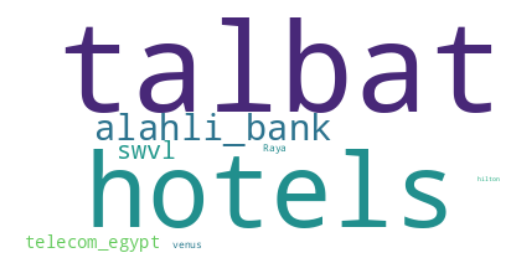

In [ ]:
#word cloud


# Convert all elements in the column to string and concatenate
text_rdd = df.select("Company").rdd.flatMap(lambda x: x)
text_list = text_rdd.map(lambda x: str(x)).collect()
text2 = " ".join(text_list)

# Generate the word cloud
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

# Plotting
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

# Lemmatization

In [ ]:

# # Define the function to convert to Classical Arabic using Farasa
# def convert_to_classical_arabic(texts):
#     # Create a FarasaStemmer instance
#     stemmer = FarasaStemmer()

#     # Perform stemming on each text in the Pandas Series
#     return pd.Series([stemmer.stem(text) for text in texts])

# # Register the UDF
# convert_udf = pandas_udf(convert_to_classical_arabic, returnType=StringType())

# # Apply the UDF to the DataFrame
# df = df.withColumn("review_description", convert_udf(df["review_description"]))

# # spark.conf.set("spark.sql.repl.eagerEval.enabled", True)
# # Show some results
# df.show()

# # Remember to stop the Spark session
# # spark.stop()


# Tokenization

In [ ]:

# Assuming df is your DataFrame and you have a 'review_description' column
# Create a Tokenizer instance
tokenizer = Tokenizer(inputCol="review_description", outputCol="tokens")

# Tokenize the 'review_description' column and concatenate the array elements into a single string
df = tokenizer.transform(df).withColumn("review_description", concat_ws(" ", col("tokens"))).drop("tokens")

# Display the DataFrame with the updated 'review_description' column
df.select("review_description").limit(10).toPandas().head()


,review_description
0,سيء جدا الاصدار الجديد
1,البرنامج القديم افضل سء وتحديثاته لا تعمل وغير...
2,بنك سيء يغلقون الحساب اشياء غريبه توقيع يتم حل...
3,التحديث جيد بالمره لا يمكن اضافه مستفيد دولي ط...
4,تحديث الشكل الجديد صارت اخر اشعارات البنك


In [ ]:
df.select("review_description").show(10, truncate=False)

+----------------------------------------------------------------------------------------------------------------------------+
|review_description                                                                                                          |
+----------------------------------------------------------------------------------------------------------------------------+
|سيء جدا الاصدار الجديد                                                                                                      |
|البرنامج القديم افضل سء وتحديثاته لا تعمل وغير ناجح                                                                         |
|بنك سيء يغلقون الحساب اشياء غريبه توقيع يتم حل المشكله اول زياره تحتاج تداوم عندهم بالفرع عشان يرجعوا                       |
|التحديث جيد بالمره لا يمكن اضافه مستفيد دولي طوروا الخدمات افضل انكم تطوروا الجرافيك الي يثقل البرنامج ويخليه غبي           |
|تحديث الشكل الجديد صارت اخر اشعارات البنك                                                                     

# Handling Arabic-specific Challenges

In [ ]:

# Function to remove Arabic diacritics
def remove_diacritics(text):
    arabic_diacritics = re.compile("""
                                ّ    | # Shadda
                                َ    | # Fatha
                                ً    | # Tanwin Fath
                                ُ    | # Damma
                                ٌ    | # Tanwin Damm
                                ِ    | # Kasra
                                ٍ    | # Tanwin Kasr
                                ْ    | # Sukun
                                ـ     # Tatweel/Kashida
                            """, re.VERBOSE)
    return re.sub(arabic_diacritics, '', text)

# UDF for removing Arabic diacritics
remove_diacritics_udf = udf(remove_diacritics, StringType())

# Sample function for other Arabic-specific processing (add as needed)
def other_arabic_processing(text):
    # Implement other processing steps here
    return text

# UDF for other Arabic processing
other_arabic_processing_udf = udf(other_arabic_processing, StringType())

# Assuming df is your DataFrame and 'review_description' is the column to process
# Apply UDFs to the DataFrame
df = df.withColumn('review_description', remove_diacritics_udf(df['review_description']))
df = df.withColumn('review_description', other_arabic_processing_udf(df['review_description']))

# Show the first few rows of the DataFrame
df.show()




+--------------------+------+-----------+
|  review_description|rating|    company|
+--------------------+------+-----------+
|سيء جدا الاصدار ا...|    -1|alahli_bank|
|البرنامج القديم ا...|    -1|alahli_bank|
|بنك سيء يغلقون ال...|    -1|alahli_bank|
|التحديث جيد بالمر...|    -1|alahli_bank|
|تحديث الشكل الجدي...|    -1|alahli_bank|
|التحديث الاخير ما...|    -1|alahli_bank|
|التطبيق الجديد جد...|    -1|alahli_bank|
|سي جدا وانصح بعدم...|    -1|alahli_bank|
|تطبيق لا يتح خيار...|    -1|alahli_bank|
|اخس التطبيقات واخ...|    -1|alahli_bank|
|استطع اوافق علي ا...|     0|alahli_bank|
|اخس بنك بالتعامل ...|    -1|alahli_bank|
|            رفض يحمل|    -1|alahli_bank|
|التطبيق يكتب نرجو...|    -1|alahli_bank|
|تاخير الارساك كوي...|    -1|alahli_bank|
|جميل جمال مالوش مثال|    -1|alahli_bank|
|البرنامج طلب مني ...|    -1|alahli_bank|
|انا جوالي متجر هو...|     0|alahli_bank|
|       مشكله التطبيق|    -1|alahli_bank|
|ماتوقعناها الاهلي...|    -1|alahli_bank|
+--------------------+------+-----

# Spell Checking and Correction

In [ ]:

dialect_to_classical_dict = {
    "كيفك": "كيف حالك",       # "How are you?" in informal dialect
    "إيه": "نعم",             # "Yes" in some dialects
    "شو": "ماذا",             # "What" in Levantine dialects
    "يخرب بيتك": "سبحان الله",  # Expression of surprise or frustration
    "حبيبي": "يا صديقي",      # "My dear" or "my friend"
    "في": "يوجد",             # "There is" in many dialects
    "هلا": "أهلاً وسهلاً",     # Informal welcome
    "تمام": "جيد",            # "Fine" or "okay"
    "عايز": "يريد",           # "Want" in Egyptian dialect
    "خلاص": "انتهى",          # "Finished" or "that's it"
    "بابا": "أبي",            # "Father" in an informal context
    "ماما": "أمي",            # "Mother" in an informal context
    "جزمة": "حذاء",           # "Shoe"
    "دلوقتي": "الآن",         # "Now" in Egyptian dialect
    "شكرا": "أشكرك",          # "Thank you"
    "بكرا": "غداً",           # "Tomorrow"
    "إزيك": "كيف حالك",       # "How are you?" in Egyptian dialect
    "أخويا": "أخي",           # "My brother" in an informal context
    "يلا": "هيا",             # "Let's go" or "come on"
    "مشينا": "لنذهب",         # "Let's go" in a leaving context
    "صباح الخير": "صباح النور", # "Good morning"
    "مساء الخير": "مساء النور", # "Good evening"
    "قريب": "عن قرب",         # "Close" or "nearby"
    "أوي": "كثيراً",          # "Very" or "a lot" in some dialects
    "حق": "حقاً",             # "Really" or "indeed"
    "بص": "انظر",             # "Look" in Egyptian dialect
    "إيد": "يد",              # "Hand"
    "راس": "رأس",             # "Head"
    "زعلان": "غاضب",          # "Upset" or "angry"
    "ليش": "لماذا",           # "Why" in some dialects
    "حقيقة": "واقعاً",        # "Really" or "indeed"
    "فلوس": "أموال",          # "Money"
    "دار": "بيت",             # "House" in some dialects
    "سيارة": "عربة",          # "Car"
    "تلفون": "هاتف",          # "Telephone"
    "طماطم": "بندورة",        # "Tomato"
    "خضار": "خضروات",         # "Vegetables"
    "حساء": "شوربة",          # "Soup"
    "سبورة": "لوح",           # "Blackboard"
    "امتحان": "اختبار",       # "Exam"
    "سيارة": "عربة",          # "Car"
    "باص": "حافلة",           # "Bus"
    "فرحان": "سعيد",             # "Happy"
    "غضبان": "غاضب",             # "Angry"
    "نعسان": "نائم",             # "Sleepy"
    "راكض": "جاري",              # "Running"
    "مو" : "مش",
}


def convert_to_classical_arabic(review):
    words = review.split()
    classical_words = [dialect_to_classical_dict.get(word, word) for word in words]
    return ' '.join(classical_words)

# Assuming `df` is your DataFrame and "review_description" is the column you want to convert
# Register the UDF
convert_udf = udf(convert_to_classical_arabic, StringType())

# Apply the UDF to the review_description column
df = df.withColumn("review_description", convert_udf(df["review_description"]))

# Show some results
df.show()



+--------------------+------+-----------+
|  review_description|rating|    company|
+--------------------+------+-----------+
|سيء جدا الاصدار ا...|    -1|alahli_bank|
|البرنامج القديم ا...|    -1|alahli_bank|
|بنك سيء يغلقون ال...|    -1|alahli_bank|
|التحديث جيد بالمر...|    -1|alahli_bank|
|تحديث الشكل الجدي...|    -1|alahli_bank|
|التحديث الاخير ما...|    -1|alahli_bank|
|التطبيق الجديد جد...|    -1|alahli_bank|
|سي جدا وانصح بعدم...|    -1|alahli_bank|
|تطبيق لا يتح خيار...|    -1|alahli_bank|
|اخس التطبيقات واخ...|    -1|alahli_bank|
|استطع اوافق علي ا...|     0|alahli_bank|
|اخس بنك بالتعامل ...|    -1|alahli_bank|
|            رفض يحمل|    -1|alahli_bank|
|التطبيق يكتب نرجو...|    -1|alahli_bank|
|تاخير الارساك كوي...|    -1|alahli_bank|
|جميل جمال مالوش مثال|    -1|alahli_bank|
|البرنامج طلب مني ...|    -1|alahli_bank|
|انا جوالي متجر هو...|     0|alahli_bank|
|       مشكله التطبيق|    -1|alahli_bank|
|ماتوقعناها الاهلي...|    -1|alahli_bank|
+--------------------+------+-----

# ***Models***

In [ ]:
# df.show(10, truncate=False)

# IDF-df

In [ ]:

# Convert the 'rating' column to DoubleType
df = df.withColumn("rating", df["rating"].cast(DoubleType()))

# Use StringIndexer to convert 'rating' to a numerical label column
indexer = StringIndexer(inputCol="rating", outputCol="labeli")
df = indexer.fit(df).transform(df)

# Continue with your previous code for tokenization and TF-IDF vectorization
tokenizer = Tokenizer(inputCol="review_description", outputCol="review_description_token")
df = tokenizer.transform(df)

hashingTF = HashingTF(inputCol="review_description_token", outputCol="raw_features")
idf = IDF(inputCol="raw_features", outputCol="featuress")

# Set up the pipeline
pipeline = Pipeline(stages=[hashingTF, idf])

# Fit and transform the data
model = pipeline.fit(df)
encoded_df = model.transform(df)

# Select relevant columns for further processing or analysis
selected_columns = ["featuress", "labeli"]
final_df = encoded_df.select(selected_columns)

# Split the Data
train_df, test_df = final_df.randomSplit([0.8, 0.2], seed=42)



In [ ]:

df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+------------------+------+-------+------+------------------------+
|review_description|rating|company|labeli|review_description_token|
+------------------+------+-------+------+------------------------+
|                 0|     0|      0|     0|                       0|
+------------------+------+-------+------+------------------------+



In [ ]:
# Get the counts of unique values in the 'rating' column
label_counts = train_df.groupBy('labeli').count()

# Show the counts
label_counts.show()

# Show the data types
label_counts.printSchema()

24/01/02 16:06:29 WARN DAGScheduler: Broadcasting large task binary with size 4.1 MiB
24/01/02 16:06:50 WARN DAGScheduler: Broadcasting large task binary with size 4.1 MiB


+------+-----+
|labeli|count|
+------+-----+
|   1.0|18045|
|   0.0|18946|
|   2.0|15795|
+------+-----+

root
 |-- labeli: double (nullable = false)
 |-- count: long (nullable = false)



# Test Model

## NaiveBayes Model

24/01/02 16:07:18 WARN DAGScheduler: Broadcasting large task binary with size 4.2 MiB
24/01/02 16:07:38 WARN DAGScheduler: Broadcasting large task binary with size 4.1 MiB
24/01/02 16:07:52 WARN DAGScheduler: Broadcasting large task binary with size 10.2 MiB
24/01/02 16:08:03 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/01/02 16:08:26 WARN DAGScheduler: Broadcasting large task binary with size 10.2 MiB


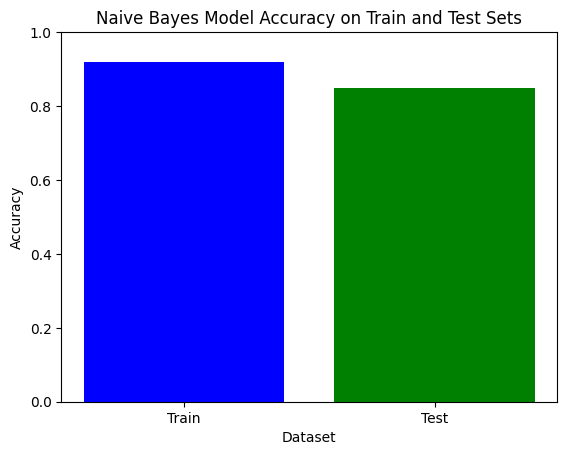

Naive Bayes Accuracy on Train Set: 0.9188610616451331
Naive Bayes Accuracy on Test Set: 0.8480925386854604


In [ ]:
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import matplotlib.pyplot as plt

# Train the Naive Bayes model
nb = NaiveBayes(featuresCol="featuress", labelCol="labeli")
nb_model = nb.fit(train_df)

# Make predictions on the test set
predictions_nb = nb_model.transform(test_df)

# Evaluate the Naive Bayes model on the training set
train_predictions_nb = nb_model.transform(train_df)
train_evaluator = MulticlassClassificationEvaluator(labelCol="labeli", predictionCol="prediction", metricName="accuracy")
train_accuracy = train_evaluator.evaluate(train_predictions_nb)

# Evaluate the Naive Bayes model on the test set
evaluator_nb = MulticlassClassificationEvaluator(labelCol="labeli", predictionCol="prediction", metricName="accuracy")
test_accuracy = evaluator_nb.evaluate(predictions_nb)

# Create a bar plot
labels = ['Train', 'Test']
accuracies = [train_accuracy, test_accuracy]

plt.bar(labels, accuracies, color=['blue', 'green'])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Naive Bayes Model Accuracy on Train and Test Sets')
plt.ylim(0, 1)  # Set the y-axis limit to be between 0 and 1 for accuracy percentage
plt.show()

# Print the Naive Bayes accuracy
print("Naive Bayes Accuracy on Train Set:", train_accuracy)
print("Naive Bayes Accuracy on Test Set:", test_accuracy)


# Test Model

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import Tokenizer

# Initialize Spark session
spark = SparkSession.builder.appName("SentimentAnalysis").getOrCreate()

# Load your trained pipeline and Naive Bayes model
# model = ... (Load your pipeline model)
# nb_model = ... (Load your Naive Bayes model)

# New text input
new_text = "إنه جميل "

# Tokenize the new text (make sure the output column matches the pipeline's expected input)
tokenizer = Tokenizer(inputCol="review_description", outputCol="review_description_token")
new_df = spark.createDataFrame([(new_text,)], ["review_description"])
new_df = tokenizer.transform(new_df)

# Transform the tokenized text through the trained pipeline
transformed_df = model.transform(new_df)

# Use the trained Naive Bayes model to predict the category
new_predictions = nb_model.transform(transformed_df)

# Map class labels to sentiments
sentiment_mapping = {
    1.0: "Negative",
    0.0: "Neutral",
    2.0: "Positive"
}

# Get the predicted sentiment label
predicted_label = int(new_predictions.select("prediction").collect()[0]["prediction"])

# Map the label to sentiment
predicted_sentiment = sentiment_mapping.get(predicted_label, "Unknown")

# Display the predicted sentiment
print(f"The predicted sentiment for the input text '{new_text}' is: {predicted_sentiment}")


24/01/02 16:08:46 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.
24/01/02 16:08:46 WARN DAGScheduler: Broadcasting large task binary with size 10.0 MiB


The predicted sentiment for the input text 'إنه جميل ' is: Positive


In [ ]:
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.sql.functions import col

# Assuming 'predictions' DataFrame has 'labeli' as true labels and 'prediction' as model predictions
prediction_and_labels = predictions_nb.select(['prediction', 'labeli']).rdd.map(lambda x: (float(x[0]), float(x[1])))

# Instantiate metrics object
metrics = MulticlassMetrics(prediction_and_labels)

# Confusion Matrix
confusion_matrix_spark = metrics.confusionMatrix().toArray()


/opt/conda/lib/python3.10/site-packages/pyspark/sql/context.py:158: FutureWarning:

Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.

24/01/02 16:09:01 WARN DAGScheduler: Broadcasting large task binary with size 10.1 MiB
24/01/02 16:09:07 WARN DAGScheduler: Broadcasting large task binary with size 10.2 MiB


24/01/02 16:09:27 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.
24/01/02 16:09:40 WARN DAGScheduler: Broadcasting large task binary with size 10.1 MiB
24/01/02 16:09:45 WARN DAGScheduler: Broadcasting large task binary with size 10.2 MiB
24/01/02 16:10:17 WARN DAGScheduler: Broadcasting large task binary with size 4.1 MiB
24/01/02 16:10:49 WARN DAGScheduler: Broadcasting large task binary with size 4.1 MiB


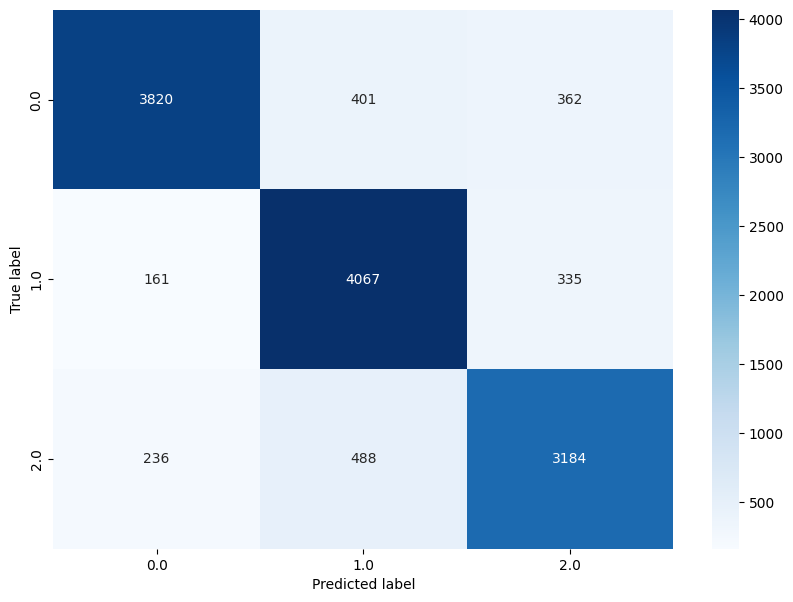

In [ ]:
from pyspark.sql import SparkSession
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.sql.functions import col
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Initialize Spark session
spark = SparkSession.builder.appName("ConfusionMatrixPlot").getOrCreate()

# Assuming 'predictions' is your PySpark DataFrame with model predictions
# Ensure predictions has columns 'labeli' for true labels and 'prediction' for predictions

# Convert to RDD for MulticlassMetrics
prediction_and_labels = predictions_nb.select(['prediction', 'labeli']).rdd.map(lambda x: (float(x[0]), float(x[1])))

# Instantiate metrics object
metrics = MulticlassMetrics(prediction_and_labels)

# Confusion Matrix
confusion_matrix_spark = metrics.confusionMatrix().toArray()

# Convert the confusion matrix to a Pandas DataFrame
confusion_matrix_pd = pd.DataFrame(confusion_matrix_spark,
                                   index=np.unique(predictions_nb.select('labeli').toPandas()['labeli']),
                                   columns=np.unique(predictions_nb.select('labeli').toPandas()['labeli']))

# Convert values to integers
confusion_matrix_pd = confusion_matrix_pd.astype(int)

# Plot using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix_pd, annot=True, fmt="d", cmap="Blues")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


24/01/02 16:11:21 WARN DAGScheduler: Broadcasting large task binary with size 10.2 MiB


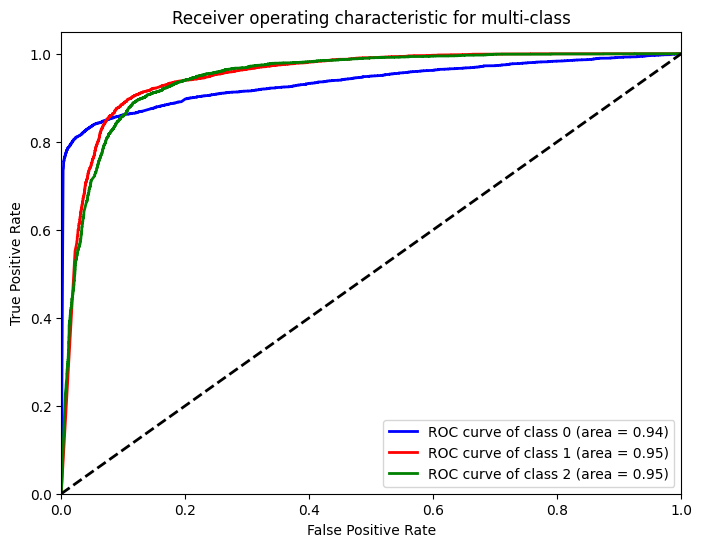

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming 'predictions_nb' is your PySpark DataFrame and it has the 'probability' and 'labeli' columns
# Convert the PySpark DataFrame to a pandas DataFrame
predictions_pd = predictions_nb.toPandas()

# Binarize the labels for multiclass
n_classes = predictions_pd['labeli'].nunique()
y_test_binarized = label_binarize(predictions_pd['labeli'], classes=[*range(n_classes)])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], predictions_pd['probability'].apply(lambda x: x[i]))
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()


# Linear Regression Model

In [ ]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# Assuming 'labeli' is a continuous variable suitable for regression
# Specify the correct column name for features
lr = LinearRegression(featuresCol="featuress", labelCol="labeli")
model = lr.fit(train_df)

# Model Evaluation
predictions = model.transform(test_df)

# Evaluate the model using RegressionEvaluator
evaluator = RegressionEvaluator(labelCol="labeli", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)

# Print the RMSE
print("Root Mean Squared Error (RMSE):", rmse)


24/01/02 16:12:10 WARN DAGScheduler: Broadcasting large task binary with size 4.2 MiB
24/01/02 16:12:29 WARN DAGScheduler: Broadcasting large task binary with size 4.2 MiB
24/01/02 16:12:29 WARN DAGScheduler: Broadcasting large task binary with size 4.2 MiB
24/01/02 16:12:48 WARN DAGScheduler: Broadcasting large task binary with size 4.2 MiB
24/01/02 16:12:48 WARN DAGScheduler: Broadcasting large task binary with size 4.2 MiB
24/01/02 16:12:49 WARN DAGScheduler: Broadcasting large task binary with size 4.2 MiB
24/01/02 16:12:49 WARN DAGScheduler: Broadcasting large task binary with size 4.2 MiB
24/01/02 16:12:49 WARN DAGScheduler: Broadcasting large task binary with size 4.2 MiB
24/01/02 16:12:49 WARN DAGScheduler: Broadcasting large task binary with size 4.2 MiB
24/01/02 16:12:49 WARN DAGScheduler: Broadcasting large task binary with size 4.2 MiB
24/01/02 16:12:50 WARN DAGScheduler: Broadcasting large task binary with size 4.2 MiB
24/01/02 16:12:50 WARN DAGScheduler: Broadcasting larg

Root Mean Squared Error (RMSE): 1.0756346689076184


24/01/02 16:14:38 WARN DAGScheduler: Broadcasting large task binary with size 5.4 MiB


# LogisticRegression Model

In [ ]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.sql.types import DoubleType
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Logistic Regression model
lr = LogisticRegression(featuresCol="featuress", labelCol="labeli")  # Corrected column name here
model = lr.fit(train_df)

# Model Evaluation
predictions = model.transform(test_df)

# Model Evaluation
evaluator = MulticlassClassificationEvaluator(labelCol="labeli", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

# Print the accuracy
print("Accuracy:", accuracy)


24/01/02 16:15:06 WARN DAGScheduler: Broadcasting large task binary with size 4.2 MiB
24/01/02 16:15:24 WARN DAGScheduler: Broadcasting large task binary with size 4.2 MiB
24/01/02 16:15:25 WARN DAGScheduler: Broadcasting large task binary with size 4.2 MiB
24/01/02 16:15:44 WARN DAGScheduler: Broadcasting large task binary with size 4.2 MiB
24/01/02 16:15:44 WARN DAGScheduler: Broadcasting large task binary with size 4.2 MiB
24/01/02 16:15:45 WARN DAGScheduler: Broadcasting large task binary with size 4.2 MiB
24/01/02 16:15:45 WARN DAGScheduler: Broadcasting large task binary with size 4.2 MiB
24/01/02 16:15:45 WARN DAGScheduler: Broadcasting large task binary with size 4.2 MiB
24/01/02 16:15:45 WARN DAGScheduler: Broadcasting large task binary with size 4.2 MiB
24/01/02 16:15:46 WARN DAGScheduler: Broadcasting large task binary with size 4.2 MiB
24/01/02 16:15:46 WARN DAGScheduler: Broadcasting large task binary with size 4.2 MiB
24/01/02 16:15:46 WARN DAGScheduler: Broadcasting larg

Accuracy: 0.7685766814769419


24/01/02 16:18:08 WARN DAGScheduler: Broadcasting large task binary with size 7.9 MiB


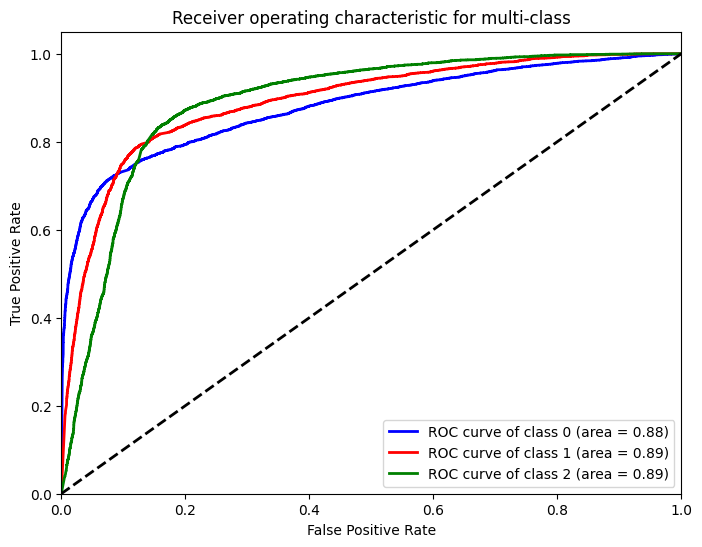

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming 'predictions_nb' is your PySpark DataFrame and it has the 'probability' and 'labeli' columns
# Convert the PySpark DataFrame to a pandas DataFrame
predictions_pd = predictions.toPandas()

# Binarize the labels for multiclass
n_classes = predictions_pd['labeli'].nunique()
y_test_binarized = label_binarize(predictions_pd['labeli'], classes=[*range(n_classes)])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], predictions_pd['probability'].apply(lambda x: x[i]))
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()
